In [1]:
import pyrosetta; pyrosetta.init()
from pyrosetta import *
init()
from pyrosetta.toolbox import pose_from_rcsb
from pyrosetta.toolbox import cleanATOM
from pyrosetta.teaching import *
from pyrosetta import PyMOLMover
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from split_energy import energy_intervals
from split_energy import split_energy
from split_energy import plot
import IPython
from stride import stride
from stride import no_secondary

┌──────────────────────────────────────────────────────────────────────────────┐
│                                 PyRosetta-4                                  │
│              Created in JHU by Sergey Lyskov and PyRosetta Team              │
│              (C) Copyright Rosetta Commons Member Institutions               │
│                                                                              │
│ NOTE: USE OF PyRosetta FOR COMMERCIAL PURPOSES REQUIRE PURCHASE OF A LICENSE │
│         See LICENSE.PyRosetta.md or email license@uw.edu for details         │
└──────────────────────────────────────────────────────────────────────────────┘
PyRosetta-4 2024 [Rosetta PyRosetta4.Release.python312.mac 2024.35+release.45abd6ab3e15d27b06950672a1bb868f76c03266 2024-08-28T11:40:28] retrieved from: http://www.pyrosetta.org
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.Release.python312.mac r385 2024.35+release.45abd6ab3e 45abd6ab3e15d27b

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.72206 seconds.
core.import_pose.import_pose: File '4CQH.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLU 16
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLU 16
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE2 on residue GLU 16
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CD  on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OE1 on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  NE2 on residue GLN 88
core.conformation.Conformation: [ WARNING ] missing heavyatom:  CG  on residue ASP 89
core.conformation.Confor

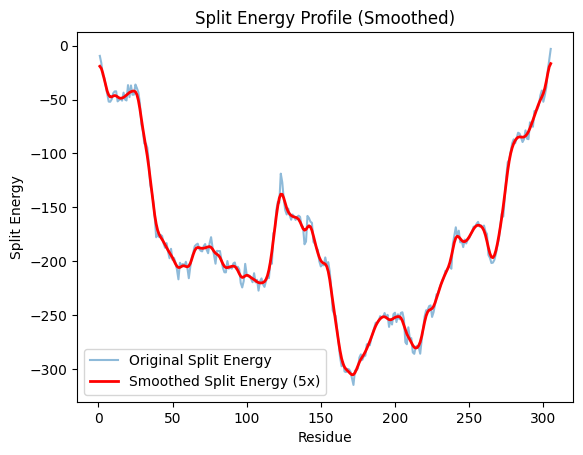

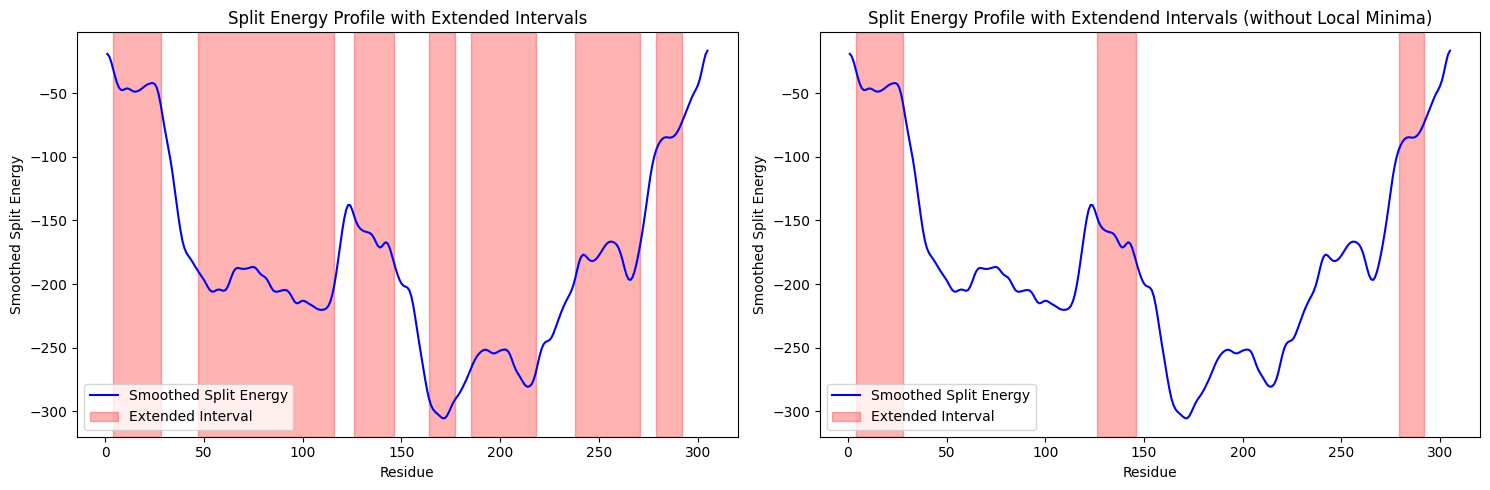

In [2]:
ifp, se_ifp = split_energy("4CQH")
plot(se_ifp)
merged_ifp, filtered_ifp = energy_intervals(se_ifp)
plot(se_ifp, merged_intervals=merged_ifp, filtered_intervals=filtered_ifp, type ='intervals')

In [3]:
ifp.total_residue()

306

core.import_pose.import_pose: File '1GFL.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: [ WARNING ] missing heavyatom:  O   on residue SER 65
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue THR:CtermProteinFull 230
core.conformation.Conformation: [ WARNING ] missing heavyatom:  O   on residue SER 295
core.conformation.Conformation: [ WARNING ] missing heavyatom:  OXT on residue THR:CtermProteinFull 460
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


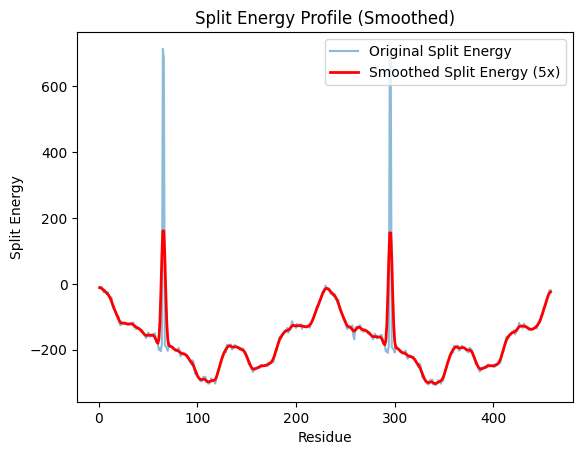

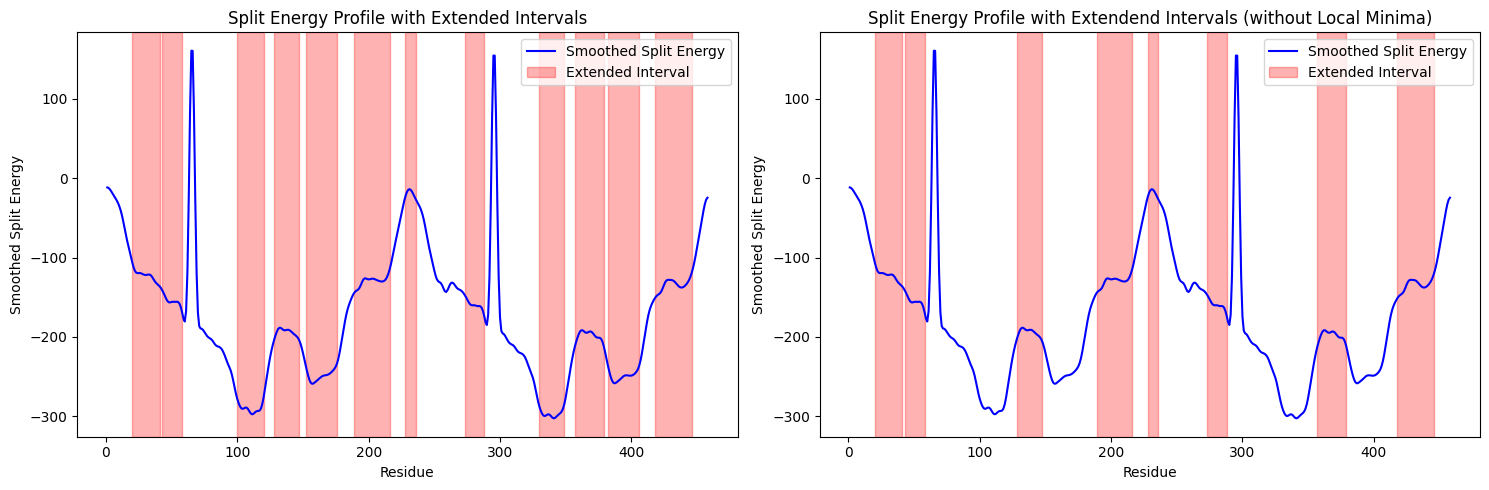

In [3]:
gfp, se_gfp = split_energy("1GFL")
plot(se_gfp)
merged_gfp, filtered_gfp = energy_intervals(se_gfp)
plot(se_gfp, merged_intervals=merged_gfp, filtered_intervals=filtered_gfp, type ='intervals')

core.import_pose.import_pose: File '1UBQ.clean.pdb' automatically determined to be of type PDB
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015


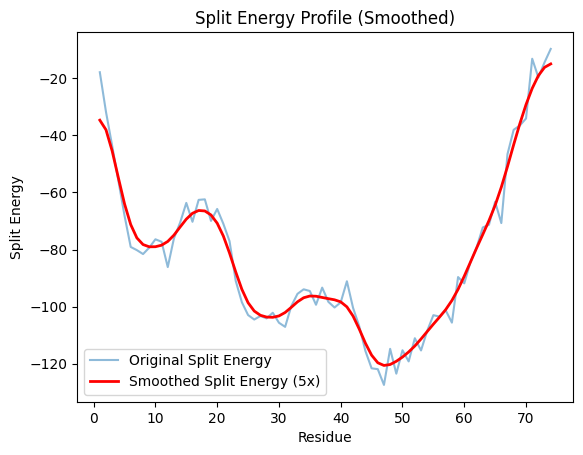

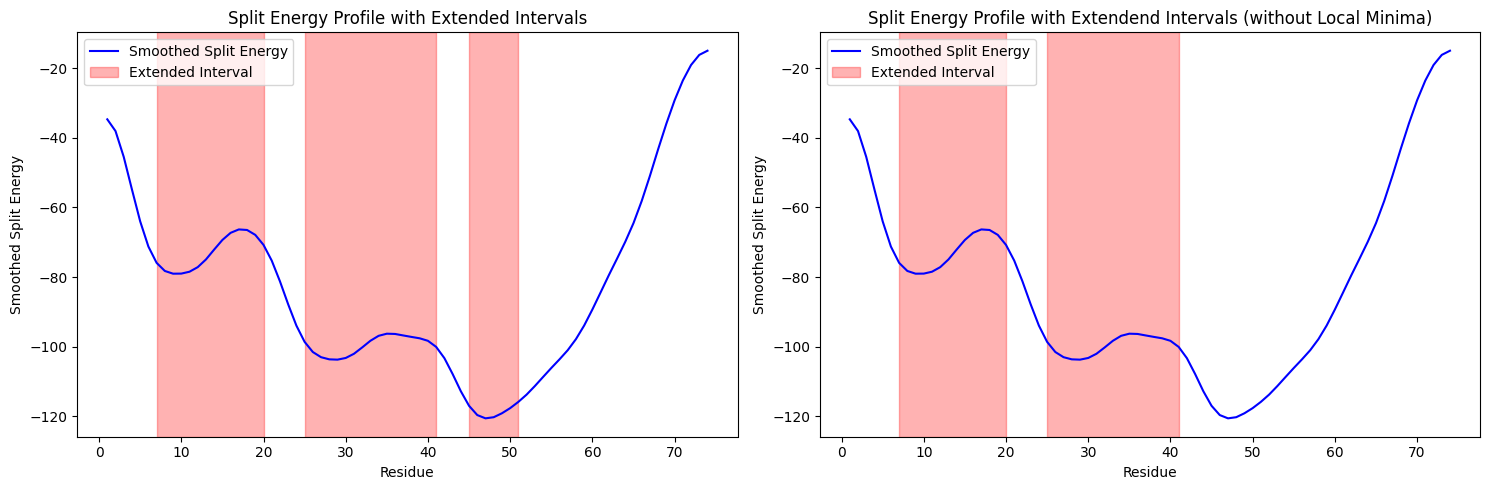

In [9]:
ubq, se_ubq = split_energy("1UBQ")
plot(se_ubq)
merged_ubq, filtered_ubq = energy_intervals(se_ubq)
plot(se_ubq, merged_intervals=merged_ubq, filtered_intervals=filtered_ubq, type ='intervals')

core.chemical.GlobalResidueTypeSet: Finished initializing fa_standard residue type set.  Created 985 residue types
core.chemical.GlobalResidueTypeSet: Total time to initialize 1.6864 seconds.
core.import_pose.import_pose: File '1ZG4.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: Found disulfide between residues 52 98
core.scoring.ScoreFunctionFactory: SCOREFUNCTION: ref2015
core.scoring.etable: Starting energy table calculation
core.scoring.etable: smooth_etable: changing atr/rep split to bottom of energy well
core.scoring.etable: smooth_etable: spline smoothing lj etables (maxdis = 6)
core.scoring.etable: smooth_etable: spline smoothing solvation etables (max_dis = 6)
core.scoring.etable: Finished calculating energy tables.
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBPoly1D.csv
basic.io.database: Database file opened: scoring/score_functions/hbonds/ref2015_params/HBFadeIntervals.csv
basic.io.database: 

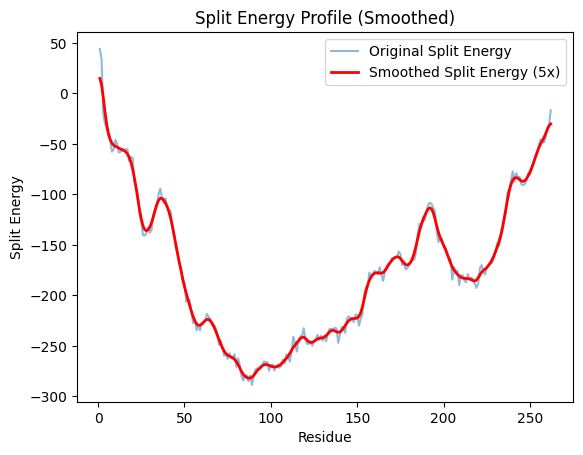

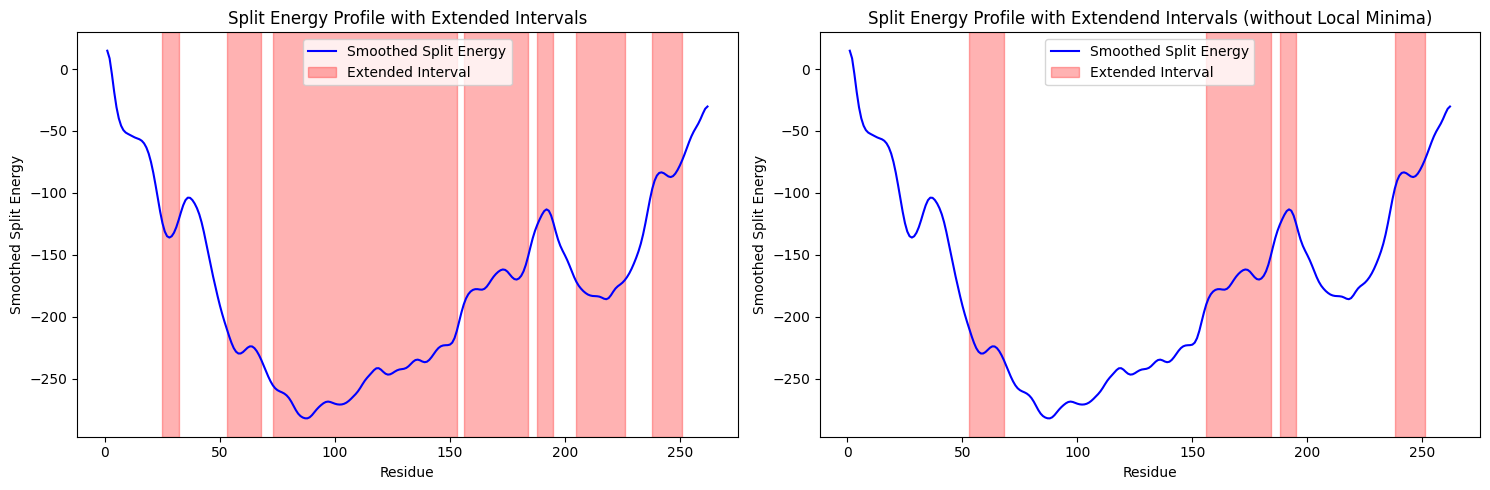

In [2]:
lac, se_lac = split_energy("1ZG4")
plot(se_lac)
merged_lac, filtered_lac = energy_intervals(se_lac)
plot(se_lac, merged_intervals=merged_lac, filtered_intervals=filtered_lac, type ='intervals')

In [3]:
pdb = '/Users/preetshah/Uni/Bioinfo/switchable-split-proteins/data/1zg4.pdb'
temp = stride(pdb, system='mac', stride_dir='/Users/preetshah/Uni/Bioinfo/switchable-split-proteins/stride/stride', output_dir='/data/strideout')
print(temp)
temp[['resnum', 'saa']] = temp[['resnum', 'saa']].astype('float64')


     ASG   aa chain pdbpos resnum code        name      phi     psi    saa
0    ASG  HIS     A     26      1    C        Coil   360.00  140.17   85.5
1    ASG  PRO     A     27      2    H  AlphaHelix   -70.92  -19.49   74.7
2    ASG  GLU     A     28      3    H  AlphaHelix   -64.46  -26.30  102.5
3    ASG  THR     A     29      4    H  AlphaHelix   -74.43  -30.91    0.8
4    ASG  LEU     A     30      5    H  AlphaHelix   -70.47  -29.39   45.1
..   ...  ...   ...    ...    ...  ...         ...      ...     ...    ...
258  ASG  LEU     A    286    259    H  AlphaHelix   -59.79  -36.88    3.0
259  ASG  ILE     A    287    260    H  AlphaHelix   -75.73  -41.54   25.2
260  ASG  LYS     A    288    261    H  AlphaHelix   -59.96  -39.13  169.7
261  ASG  HIS     A    289    262    H  AlphaHelix  -104.33   20.96   52.8
262  ASG  TRP     A    290    263    C        Coil   -52.58  360.00   93.4

[263 rows x 10 columns]


In [4]:
split_sites = []
for i in range(1,lac.total_residue()):
    sites = (i, i+1)
    if (temp.loc[temp['resnum']==sites[0], 'saa'].values[0] > 30) and (temp.loc[temp['resnum']==sites[1], 'saa'].values[0] > 30):
        ### If-condition for conservation score: < 2
        if (temp.loc[temp['resnum']==sites[0], 'code'].isin(['C','T']).iloc[0]) | (temp.loc[temp['resnum']==sites[1], 'code'].isin(['C','T']).iloc[0]):
            split_sites.append(sites)

In [5]:
loops = []
start = None
for i in range(1,lac.total_residue()+1):
    if (temp.loc[temp['resnum']==i, 'code'].isin(['C','T']).iloc[0]):
        if start is None:
            start = i
    else:
        if start is not None:
            loops.append((start, i-1))
            start = None
if start is not None:
    loops.append((start, i))

In [6]:
dump_list = []
sites_loop = []
for start, end in loops:
    for i in split_sites:
        if start <= i[0]+1 <= end+1:
            dump_list.append(i)
        else:
            sites_loop.append(dump_list)
            dump_list = []
sites_loop.append(dump_list)
sites_loop = [x for x in sites_loop if x != []]

In [7]:
sites_loop_filtered = []
for i in sites_loop:
    list_sum = []
    if len(i) > 1:
        for site in i:
            sum = temp.loc[temp['resnum']==site[0], 'saa'].values[0] + temp.loc[temp['resnum']==site[1], 'saa'].values[0]
            list_sum.append(sum)
        sorted = list(np.argsort(list_sum)[::-1][:2])
        if np.abs(i[sorted[0]][0] - i[sorted[1]][0]) > 5:
            sites_loop_filtered.append([i[j] for j in sorted])
        else:
            sites_loop_filtered.append([i[sorted[0]]])
    else:
        sites_loop_filtered.append(i)

In [9]:
for i in sites_loop_filtered[:]:
    bool = []
    if len(i) < 2:
        for start, end in filtered_lac:
            if not (start <= i[0][0] + 1 <= end + 1):
                bool.append(False)
            else:
                bool.append(True)
        if not any(bool):
            sites_loop_filtered.remove(i)